In [45]:
import pandas as pd

In [46]:
orders = pd.read_csv('D:\合作店铺\中世\/Agg Data\中世_店铺销量.csv',index_col = 0)
receives = pd.read_csv('D:\合作店铺\中世\/Agg Data\中世_店铺回款.csv',index_col = 0)

<>:1: SyntaxWarning: invalid escape sequence '\/'
<>:2: SyntaxWarning: invalid escape sequence '\/'
<>:1: SyntaxWarning: invalid escape sequence '\/'
<>:2: SyntaxWarning: invalid escape sequence '\/'
C:\Users\jackyzhu\AppData\Local\Temp\ipykernel_33192\1192943880.py:1: SyntaxWarning: invalid escape sequence '\/'
  orders = pd.read_csv('D:\合作店铺\中世\/Agg Data\中世_店铺销量.csv',index_col = 0)
C:\Users\jackyzhu\AppData\Local\Temp\ipykernel_33192\1192943880.py:2: SyntaxWarning: invalid escape sequence '\/'
  receives = pd.read_csv('D:\合作店铺\中世\/Agg Data\中世_店铺回款.csv',index_col = 0)


In [47]:
orders = orders.groupby(['seller_id','year','month'])['amount_usd'].sum().reset_index()

In [48]:
receives = receives.groupby(['seller_id','year','month'])['amount_usd'].sum().reset_index()

In [49]:
orders

,seller_id,year,month,amount_usd
0,A2ST06RBRNM2YB,2022,2,27421.742111
1,A2ST06RBRNM2YB,2022,3,19229.472002
2,A2ST06RBRNM2YB,2022,4,26837.101357
3,A2ST06RBRNM2YB,2022,5,45226.627127
4,A2ST06RBRNM2YB,2022,6,47818.557269
...,...,...,...,...
120,AYBG8KY93WXSD,2023,10,99715.108701
121,AYBG8KY93WXSD,2023,11,80808.303315
122,AYBG8KY93WXSD,2023,12,115091.110682
123,AYBG8KY93WXSD,2024,1,77745.199887


In [50]:
receives.columns = ['seller_id','year','month','receives']

In [51]:
orders = orders.merge(receives[['seller_id','year','month','receives']],how = 'inner', on = ['seller_id','year','month'])

In [52]:
seller_list  = orders.seller_id.unique().tolist()

In [54]:
seller_dict = {}
for i in range(0,5):
    seller = seller_list[i]
    seller_dict[seller] = i + 1

In [55]:
seller_dict

{'A2ST06RBRNM2YB': 1,
 'A2UVSPW9T36W11': 2,
 'A3A2SKWMOC62VF': 3,
 'A4UEEFW5C73SF': 4,
 'AYBG8KY93WXSD': 5}

In [56]:
orders['date'] = orders['year'].astype(str) + '-' + orders['month'].astype(str)

In [57]:
orders = orders[orders.seller_id.isin(seller_dict)]

In [58]:
orders['seller_code'] = orders['seller_id'].apply(lambda x:seller_dict[x])

In [59]:
orders

,seller_id,year,month,amount_usd,receives,date,seller_code
0,A2ST06RBRNM2YB,2022,2,27421.742111,5815.692922,2022-2,1
1,A2ST06RBRNM2YB,2022,3,19229.472002,3955.305997,2022-3,1
2,A2ST06RBRNM2YB,2022,4,26837.101357,5195.323051,2022-4,1
3,A2ST06RBRNM2YB,2022,5,45226.627127,8225.266989,2022-5,1
4,A2ST06RBRNM2YB,2022,6,47818.557269,7291.890585,2022-6,1
...,...,...,...,...,...,...,...
116,AYBG8KY93WXSD,2023,9,105724.969029,28683.867126,2023-9,5
117,AYBG8KY93WXSD,2023,10,99715.108701,16661.723388,2023-10,5
118,AYBG8KY93WXSD,2023,11,80808.303315,13937.202244,2023-11,5
119,AYBG8KY93WXSD,2023,12,115091.110682,21828.163374,2023-12,5


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

<>:12: SyntaxWarning: invalid escape sequence '\/'
<>:12: SyntaxWarning: invalid escape sequence '\/'
C:\Users\jackyzhu\AppData\Local\Temp\ipykernel_33192\3835856469.py:12: SyntaxWarning: invalid escape sequence '\/'
  plt.savefig('D:\合作店铺\中世\/sale_corr.jpg',dpi = 300)


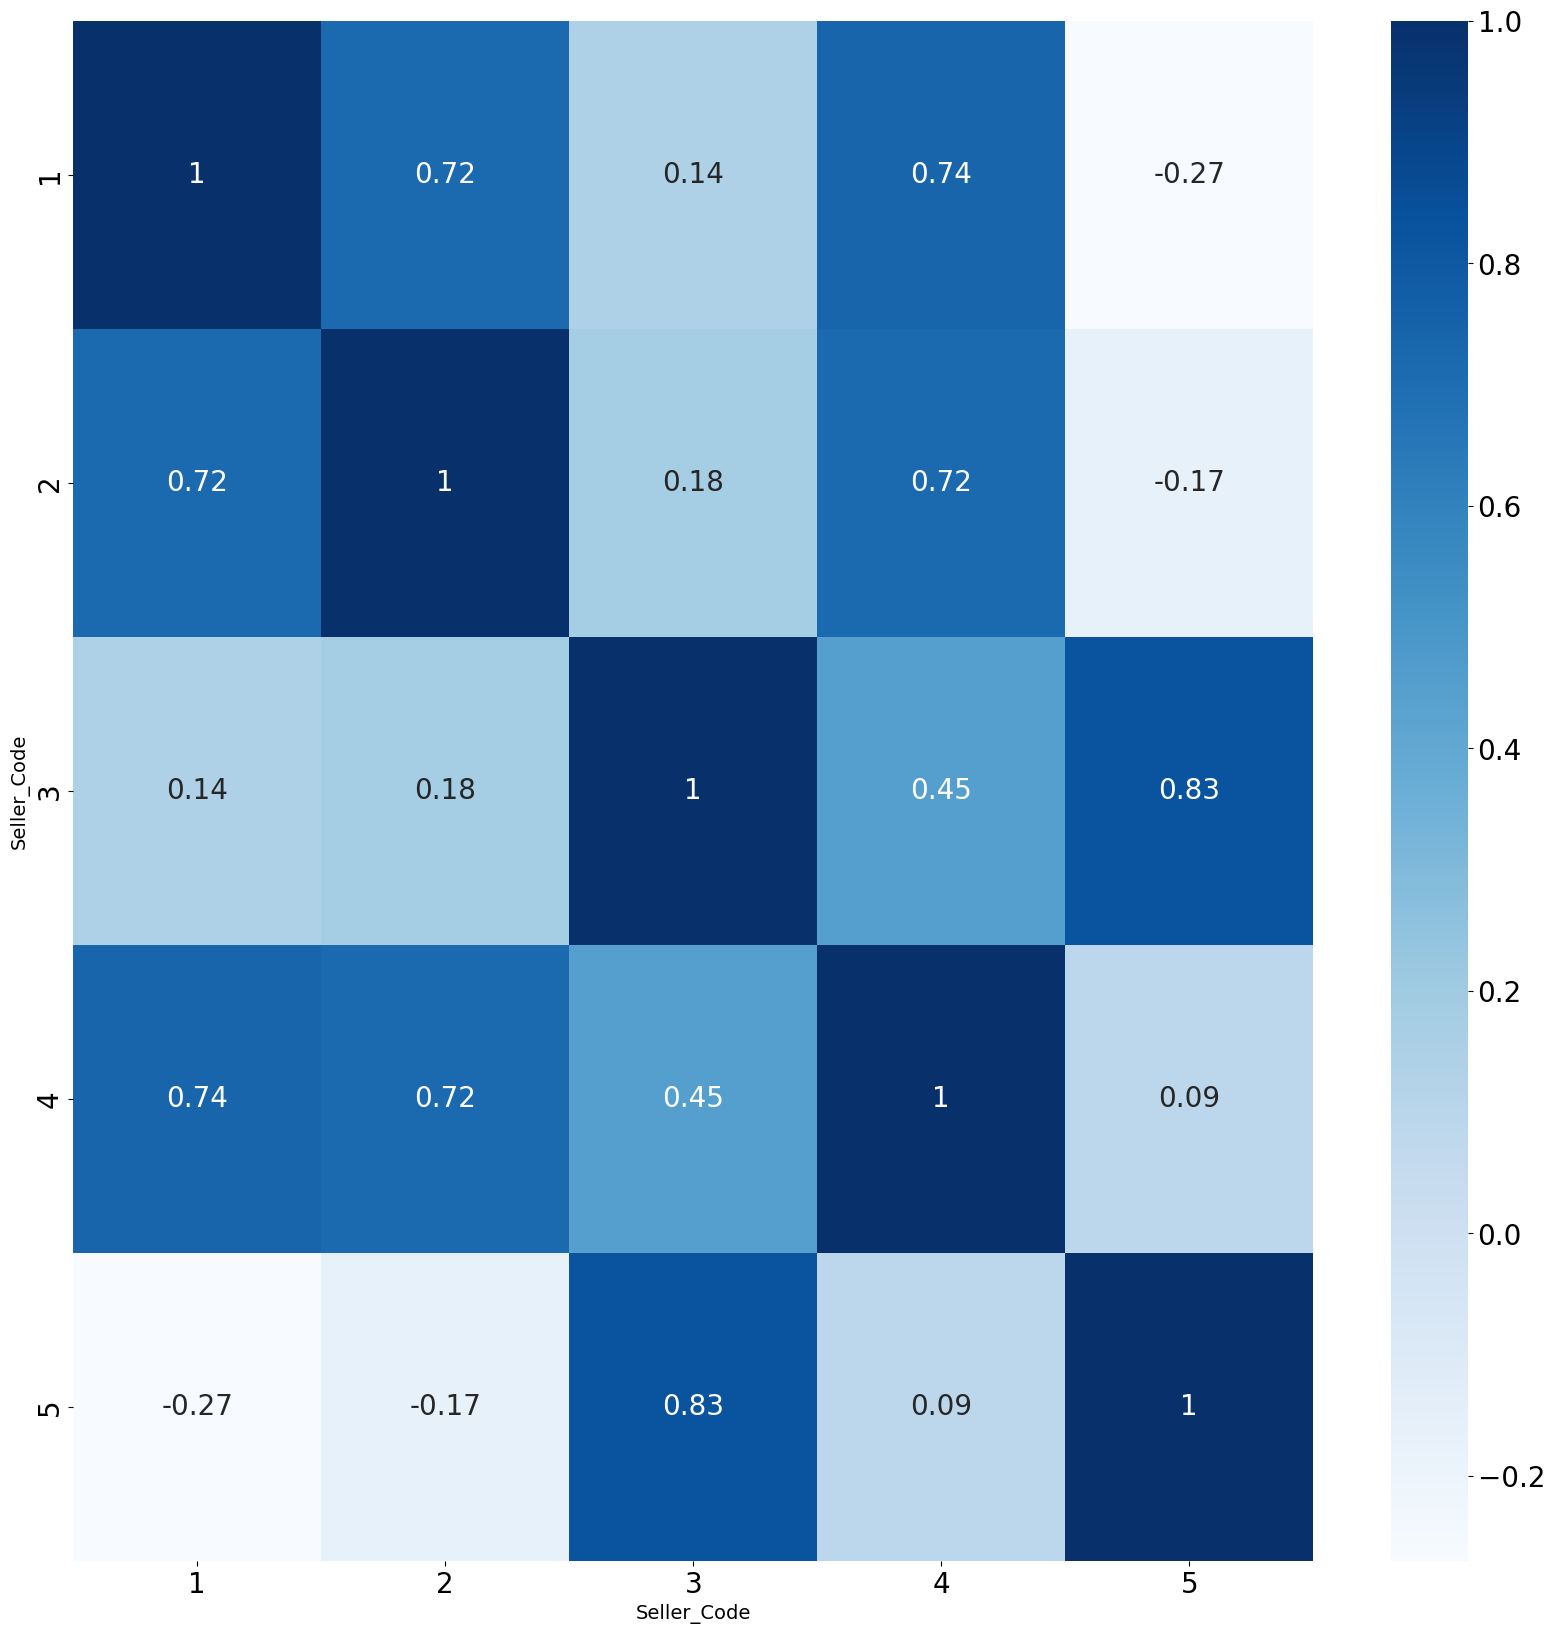

In [62]:
sales_df = orders.pivot(columns='seller_code',values = 'amount_usd',index= 'date').reset_index(drop=True)
sales_corr = sales_df.corr().round(2)
plt.figure(figsize=(20,20))
ax = sns.heatmap(sales_corr,cmap='Blues',annot= True,annot_kws={'size': 20})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
plt.xticks(fontsize = 20)
plt.xlabel('Seller_Code', fontsize=14)
plt.yticks(fontsize = 20)
plt.ylabel('Seller_Code', fontsize=14)
#plt.title('Copachi Sales Correlation Heatmap',fontsize = 20)
plt.savefig('D:\合作店铺\中世\/sale_corr.jpg',dpi = 300)

<>:12: SyntaxWarning: invalid escape sequence '\/'
<>:12: SyntaxWarning: invalid escape sequence '\/'
C:\Users\jackyzhu\AppData\Local\Temp\ipykernel_33192\663964110.py:12: SyntaxWarning: invalid escape sequence '\/'
  plt.savefig('D:\合作店铺\中世\/receives_corr.jpg',dpi = 300)


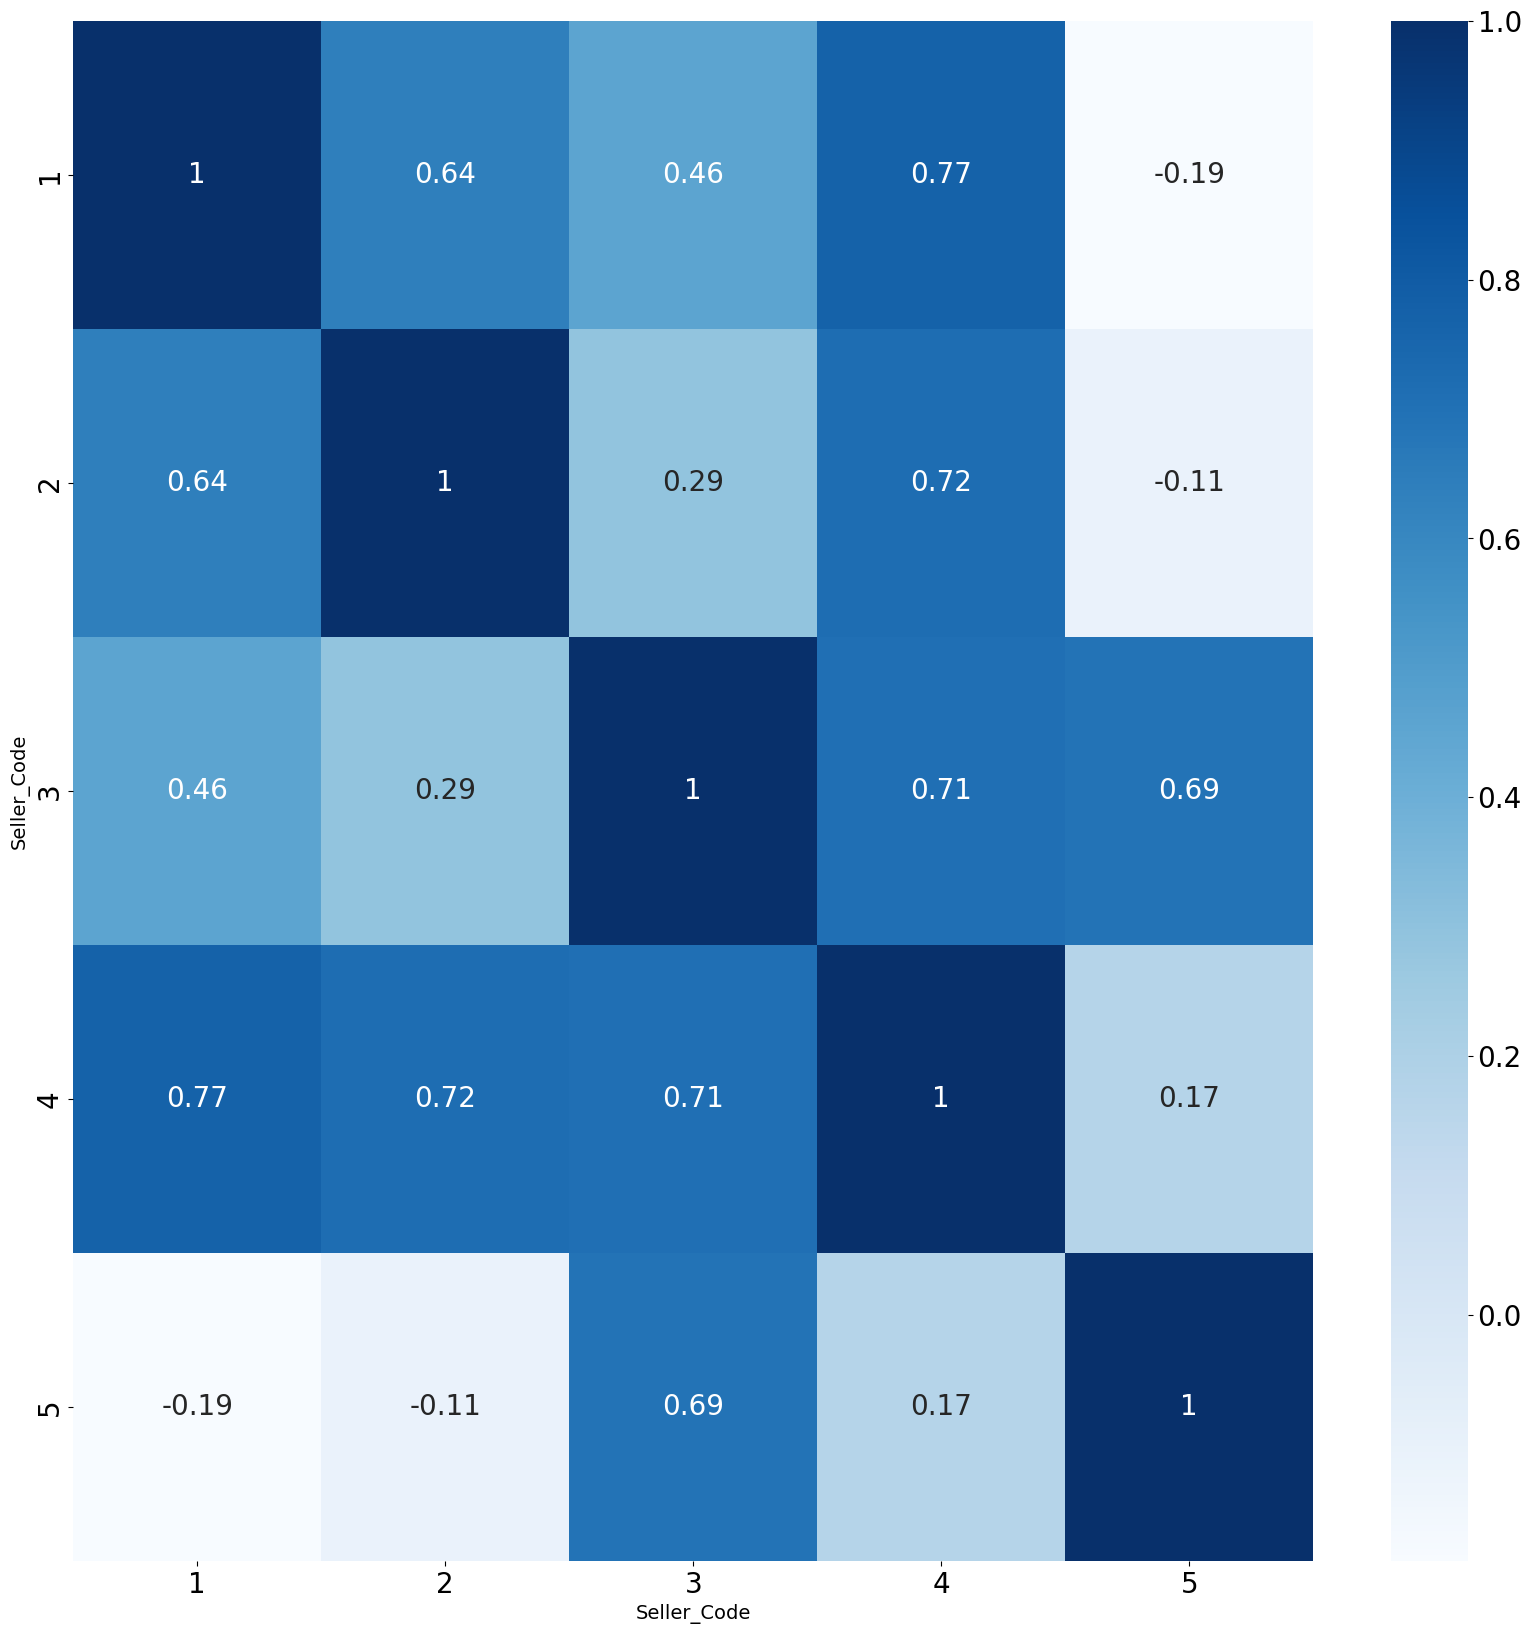

In [61]:
rec_df = orders.pivot(columns='seller_code',values = 'receives',index= 'date').reset_index(drop=True)
rec_corr = rec_df.corr().round(2)
plt.figure(figsize=(20,20))
ax = sns.heatmap(rec_corr,cmap='Blues',annot= True,annot_kws={'size': 20})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
plt.xticks(fontsize = 20)
plt.xlabel('Seller_Code', fontsize=14)
plt.yticks(fontsize = 20)
plt.ylabel('Seller_Code', fontsize=14)
#plt.title('Copachi Receives Correlation Heatmap',fontsize = 20)
plt.savefig('D:\合作店铺\中世\/receives_corr.jpg',dpi = 300)